In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
def num_files(filepath):
    file_count = 0
    for item in os.listdir(filepath):
        item_path = os.path.join(filepath, item)
        # Check if it's a file
        if os.path.isfile(item_path):
            file_count += 1 
    return file_count

In [13]:
def getSweepNum():
    filename = "task1_2_data/file_magnetisation0.csv"
    # read in file
    temp = pd.read_csv(filename)
    temp_sweeps = temp['sweeps']
    return len(temp_sweeps)


In [14]:
# initialise empty arrays
sweepNum = getSweepNum()

sweep_arrays = np.zeros(sweepNum), np.zeros(sweepNum)
mag_squares = np.zeros(sweepNum)
mag_errors = np.zeros(sweepNum)


# iterate for each file
for i in range(num_files("task1_2_data")):
    # read filename
    filename = "task1_2_data/file_magnetisation" + str(i) + ".csv"
    # read in file
    temp = pd.read_csv(filename)
    
    temp_sweeps = temp['sweeps']
    temp_magnetisation = temp['magnetisation']
    
    # adds data to sweep_arrays
    for j in range(len(temp_sweeps)):
        # append sweeps and magnetisations
        sweep_arrays[0][j] += (temp_sweeps[j] / num_files("task1_2_data"))
        sweep_arrays[1][j] += (temp_magnetisation[j] / num_files("task1_2_data"))
        
        #error stuff
        mag_squares[j] += temp_magnetisation[j]**2 / num_files("task1_2_data")
    
# calculate the standard error
mag_error = []
prefactor = 1 / ( np.sqrt( num_files("task1_data") -1 ) )
for k in range(len(mag_squares)):
    mag_error.append(np.sqrt(mag_squares[k] - sweep_arrays[1][k]**2))   

mag_error[0] = 0

/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_10859/3081717559.py:32: RuntimeWarning: invalid value encountered in sqrt
  mag_error.append(np.sqrt(mag_squares[k] - sweep_arrays[1][k]**2))


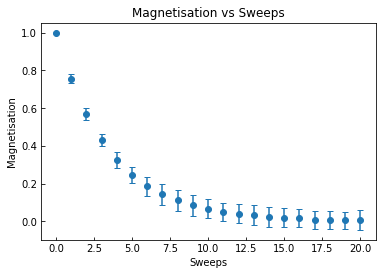

In [15]:
sweeps = sweep_arrays[0]
magnetisation = sweep_arrays[1]

#plt.plot(sweeps, magnetisation)

plt.errorbar(sweeps, magnetisation, yerr=mag_error, fmt='o', capsize=3)

import matplotlib.pyplot as plt

# Set tick parameters inwards
plt.tick_params(axis='both', direction='in')
plt.xlabel('Sweeps')
plt.ylabel('Magnetisation')
plt.title('Magnetisation vs Sweeps')
plt.savefig("figures/fig1.png")
plt.show()
